# Read CSV File + Preprocessing

In [1]:
import pandas as pd
dfn = pd.read_csv('/Users/yiweihan/Desktop/total_result123.csv')
dfc = pd.read_csv('/Users/yiweihan/Desktop/tweet_commercial.csv')
dfn['timestamp'] = pd.to_datetime(dfn['timestamp'], unit='ms')
dfc['tweet_timestamp'] = pd.to_datetime(dfc['tweet_timestamp'], unit='ms')
dfn['attitude'] = dfn['attitude'].replace('none', 'neutral')
dfn = dfn[dfn['attitude'] != 'other']
dfn.head()

,ID,ID_str,Text,timestamp,attitude,user_or_not
0,1369454760370335749,1369454760370335749,Say less I’m ready !!! I got my drinks and i g...,2021-03-10 01:07:12.768,positive,user
1,1369454831245684738,1369454831245684738,@prettyred_259 I need to spark my hookah up,2021-03-10 01:07:29.666,positive,user
2,1369455333018640385,1369455333018640385,I’m so ready to go out &amp; smoke hookah &amp...,2021-03-10 01:09:29.298,positive,user
3,1369456144780062724,1369456144780062724,“We don’t serve hookah” \nMe: hold the fuck up...,2021-03-10 01:12:42.837,neutral,user
4,1369456547051503618,1369456547051503618,everyone flaking on me tonight &amp; im not go...,2021-03-10 01:14:18.746,positive,user


In [2]:
dfc.head()

,tweet_id,tweet_id_str,tweet_created_at,tweet_user_id_str,tweet_text,tweet_user_screen_name,tweet_follower_count,tweet_location,tweet_quote_count,tweet_reply_count,tweet_retweet_count,tweet_favorite_count,tweet_user_profile_image_url,tweet_timestamp
0,1369458348056326151,1369458348056326151,Wed Mar 10 01:21:28 +0000 2021,286744411,I got 40 worth of stuff from the hookah store ...,StevieeNO_J,1166,"Milwaukee, WI",0,0,0,0,http://pbs.twimg.com/profile_images/1367333465...,2021-03-10 01:21:28.139
1,1369466805950033920,1369466805950033920,Wed Mar 10 01:55:04 +0000 2021,46472020,@Coach_fella Shit $150 might be brunch when yo...,Really_Rett,1398,Via Atlanta Ga.,0,0,0,0,http://pbs.twimg.com/profile_images/1351004849...,2021-03-10 01:55:04.658
2,1369468572041412608,1369468572041412608,Wed Mar 10 02:02:05 +0000 2021,1336875785836089346,Check out this product 😍 3.5'' RED Hookah Skul...,3DRabbitCrysta1,1,USA,0,0,0,0,http://pbs.twimg.com/profile_images/1336876005...,2021-03-10 02:02:05.727
3,1369481599390154755,1369481599390154755,Wed Mar 10 02:53:51 +0000 2021,1340417654578823169,Live Hookah returns May 14-15. Two nights. Fiv...,Schwa_H,186,Ohio & venues across the U.S.,0,0,0,0,http://pbs.twimg.com/profile_images/1340419690...,2021-03-10 02:53:51.689
4,1369482191529521152,1369482191529521152,Wed Mar 10 02:56:12 +0000 2021,1194210635891916803,Octopus in purple color is availablein CA ware...,CalibearBrand,9,"Ontario, CA",0,0,0,0,http://pbs.twimg.com/profile_images/1198600521...,2021-03-10 02:56:12.866


# 5. 所有时间序列的分析移除最后一个点，因为统计时间不足，导致突然下降(commercial & non-commercial)

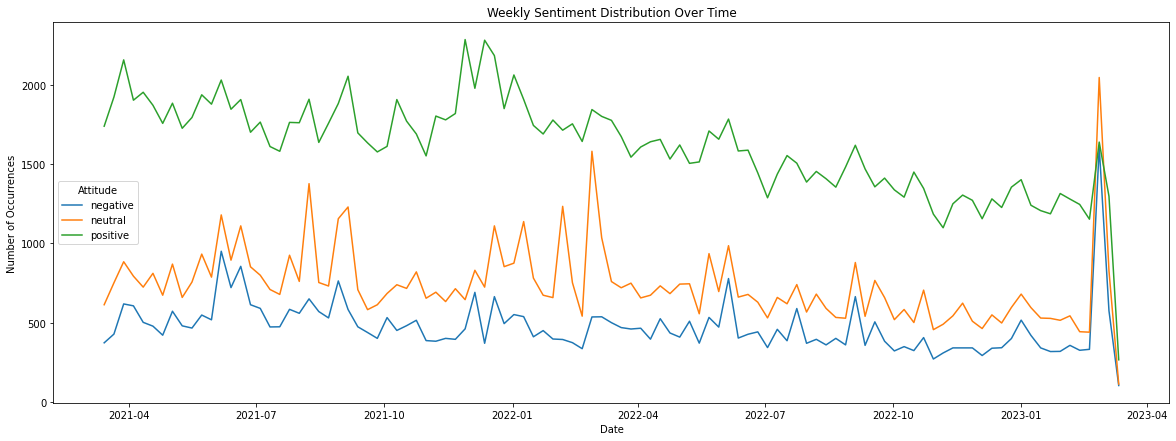

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
max_timestamp = dfn['timestamp'].max()
one_week_ago = max_timestamp - pd.Timedelta(weeks=1)
dfn = dfn[dfn['timestamp'] < one_week_ago]
df_grouped = dfn.groupby([pd.Grouper(key='timestamp', freq='W'), 'attitude']).size().unstack().fillna(0)
plt.figure(figsize=(20, 7))
sns.lineplot(data=df_grouped, dashes=False)
plt.title('Weekly Sentiment Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.legend(title='Attitude')
plt.show()

# 6. 针对commercial同样做emoji分析，并且给每个emoji配上文字解释(commercial & non-commercial)

1. Happy, hard laugh
2. Cry, a bit "Oh No"
3. Smoke
4. Hard laugh
5. Fire
6. Awwww, sad, oh no
7. Love eyes, looking forward
8. Champange
9. Cheers
10. Cheers with firework

Top emojis in positive sentiment: [('😂', 21992), ('😭', 14696), ('💨', 7252), ('🤣', 6083), ('🔥', 5265), ('😩', 4940), ('🏾', 4930), ('🍾', 4518), ('🏽', 3186), ('🎉', 3121)]


/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 127998 (\N{EMOJI MODIFIER FITZPATRICK TYPE-5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 127870 (\N{BOTTLE WITH POPPING CORK}) missing 

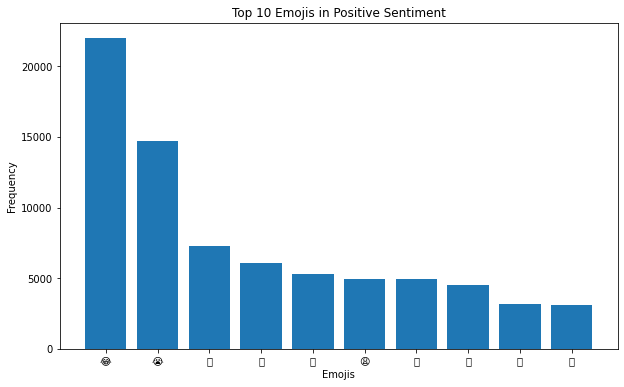

In [4]:
!pip install emoji
import pandas as pd
import emoji
from collections import Counter
import matplotlib.pyplot as plt
def extract_emojis(text):
    return [char for char in text if char in emoji.UNICODE_EMOJI['en']]
emoji_counts = {'positive': Counter(), 'neutral': Counter(), 'negative': Counter()}
for index, row in dfn.iterrows():
    emojis = extract_emojis(row['Text'])
    emoji_counts[row['attitude']].update(emojis)
print('Top emojis in positive sentiment:', emoji_counts['positive'].most_common(10))
sentiment = 'positive'
top_n = 10
most_common_emojis = emoji_counts[sentiment].most_common(top_n)
emojis = [item[0] for item in most_common_emojis]
counts = [item[1] for item in most_common_emojis]
plt.figure(figsize=(10, 6))
plt.bar(emojis, counts)
plt.title(f'Top {top_n} Emojis in {sentiment.capitalize()} Sentiment')
plt.xlabel('Emojis')
plt.ylabel('Frequency')
plt.show()

1. Happy, hard laugh
2. Cry, a bit "Oh No"
3. Hard laugh
4. Red Flag
5. Skeleton
6. Awwww, sad, oh no
7. Ewwwww
8. Roll your eyes
9. Hand on the forehead, like WTF
10. Male

Top emojis in neutral sentiment: [('😂', 20202), ('😭', 10978), ('🤣', 6566), ('🚩', 2274), ('💀', 1287), ('😩', 1001), ('🥴', 875), ('🏾', 858), ('🤦', 765), ('♂', 765)]


/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 128681 (\N{TRIANGULAR FLAG ON POST}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 128128 (\N{SKULL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 129396 (\N{FACE WITH UNEVEN EYES AND WAVY MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 127998 (\N{EMOJI MODIFIER FITZ

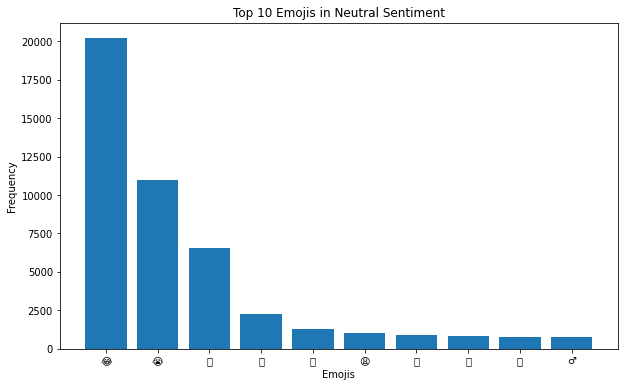

In [5]:
print('Top emojis in neutral sentiment:', emoji_counts['neutral'].most_common(10))
sentiment = 'neutral'
top_n = 10
most_common_emojis = emoji_counts[sentiment].most_common(top_n)
emojis = [item[0] for item in most_common_emojis]
counts = [item[1] for item in most_common_emojis]
plt.figure(figsize=(10, 6))
plt.bar(emojis, counts)
plt.title(f'Top {top_n} Emojis in {sentiment.capitalize()} Sentiment')
plt.xlabel('Emojis')
plt.ylabel('Frequency')
plt.show()

1. Happy, hard laugh
2. Cry, a bit "Oh No"
3. Hard laugh
4. Ewwwwwww
5. Awwww, sad, oh no
6. Red Flag
7. Skeleton
8. Male
9. Roll your eyes
10. Hand on the forehead, like WTF

Top emojis in negative sentiment: [('😂', 7297), ('😭', 5588), ('🤣', 1576), ('🥴', 1085), ('😩', 949), ('🚩', 898), ('🏾', 873), ('♂', 633), ('🏽', 604), ('🤦', 592)]


/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 129396 (\N{FACE WITH UNEVEN EYES AND WAVY MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 128681 (\N{TRIANGULAR FLAG ON POST}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 127998 (\N{EMOJI MODIFIER FITZPATRICK TYPE-5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 12

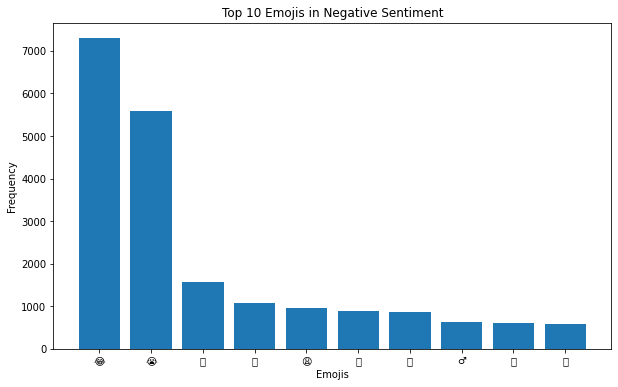

In [6]:
print('Top emojis in negative sentiment:', emoji_counts['negative'].most_common(10))
sentiment = 'negative'
top_n = 10
most_common_emojis = emoji_counts[sentiment].most_common(top_n)
emojis = [item[0] for item in most_common_emojis]
counts = [item[1] for item in most_common_emojis]
plt.figure(figsize=(10, 6))
plt.bar(emojis, counts)
plt.title(f'Top {top_n} Emojis in {sentiment.capitalize()} Sentiment')
plt.xlabel('Emojis')
plt.ylabel('Frequency')
plt.show()

1. Happy, hard laugh
2. Cry, a bit "Oh No"
3. Hard laugh
4. Red Flag
5. Skeleton
6. Awwwww, sad, oh no
7. Ewwwwwww
8. Exclaimation Mark
9. Hand on the forehead, like WTF
10. Male

Top emojis in commercial tweets: [('😂', 20202), ('😭', 10978), ('🤣', 6566), ('🚩', 2274), ('💀', 1287), ('😩', 1001), ('🥴', 875), ('🏾', 858), ('🤦', 765), ('♂', 765)]


/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 127870 (\N{BOTTLE WITH POPPING CORK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yiweihan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  fi

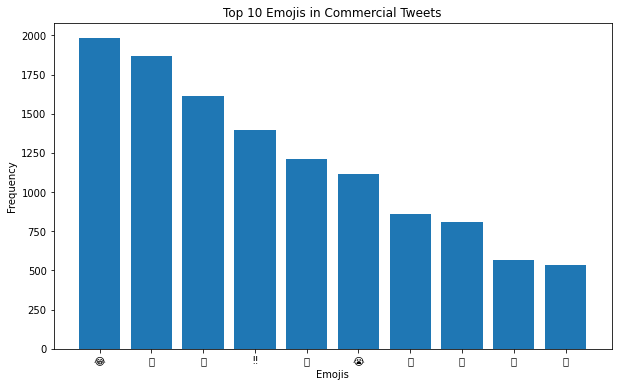

In [7]:
all_emojis_count = Counter()
for index, row in dfc.iterrows():
    emojis = extract_emojis(row['tweet_text'])
    all_emojis_count.update(emojis)
top_n = 10
most_common_emojis = all_emojis_count.most_common(top_n)
emojis = [item[0] for item in most_common_emojis]
counts = [item[1] for item in most_common_emojis]
print('Top emojis in commercial tweets:', emoji_counts['neutral'].most_common(10))
plt.figure(figsize=(10, 6))
plt.bar(emojis, counts)
plt.title(f'Top {top_n} Emojis in Commercial Tweets')
plt.xlabel('Emojis')
plt.ylabel('Frequency')
plt.show()

# 7. 在制作heatmap的时候，使用percentage of positive来代表数据，即越红说明Positive越多，这样来观察每天和每周的变化。同时也做percentage of user的heat map (non-commercial)

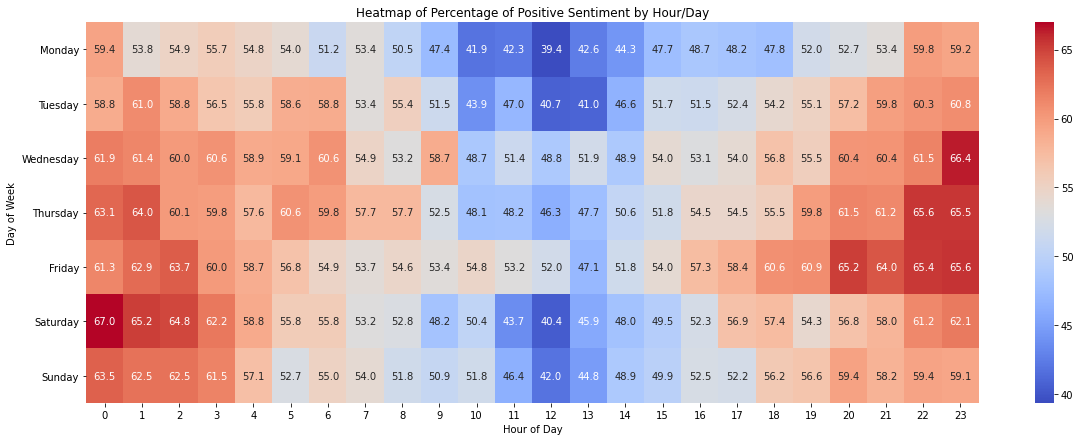

In [8]:
dfn['day_of_week'] = dfn['timestamp'].dt.day_name()
dfn['hour'] = dfn['timestamp'].dt.hour
positive_df = dfn[dfn['attitude'] == 'positive']
total_count = dfn.groupby(['day_of_week', 'hour']).size().rename('total')
positive_count = positive_df.groupby(['day_of_week', 'hour']).size().rename('positive')
pivot_table = pd.concat([total_count, positive_count], axis=1)
pivot_table['positive_percentage'] = (pivot_table['positive'] / pivot_table['total']) * 100
pivot_table = pivot_table.pivot_table(index='day_of_week', columns='hour', values='positive_percentage')
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(days_order)
plt.figure(figsize=(20, 7))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Heatmap of Percentage of Positive Sentiment by Hour/Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

# 9. 结合user or not和attitude进行分析(non-commercial)

Text(159.0, 0.5, 'Day of Week')

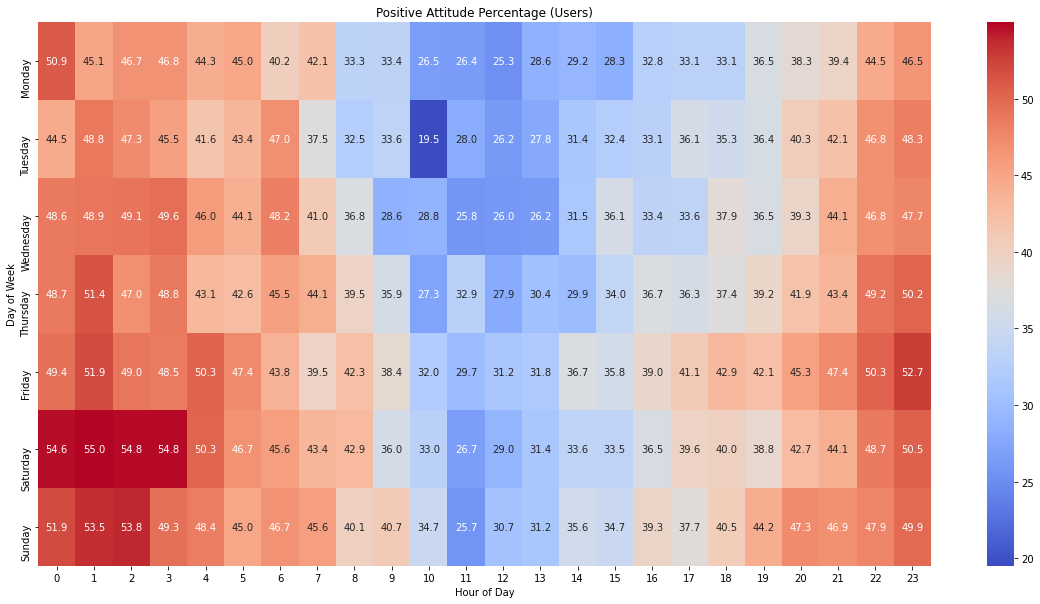

In [9]:
positive_df = dfn[dfn['attitude'] == 'positive']
def create_pivot_table(dataframe, user_status):
    filtered_df = dataframe[dataframe['user_or_not'] == user_status]
    pivot_table = pd.pivot_table(filtered_df, values='ID', 
                                 index='day_of_week', columns='hour', 
                                 aggfunc='count', fill_value=0)
    total_counts = pd.pivot_table(dfn, values='ID', 
                                  index='day_of_week', columns='hour', 
                                  aggfunc='count', fill_value=0)   
    return (pivot_table / total_counts) * 100

pivot_user = create_pivot_table(positive_df, 'user')
pivot_non_user = create_pivot_table(positive_df, 'not user')
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_user = pivot_user.reindex(days_order)
pivot_non_user = pivot_non_user.reindex(days_order)
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_user, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Positive Attitude Percentage (Users)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

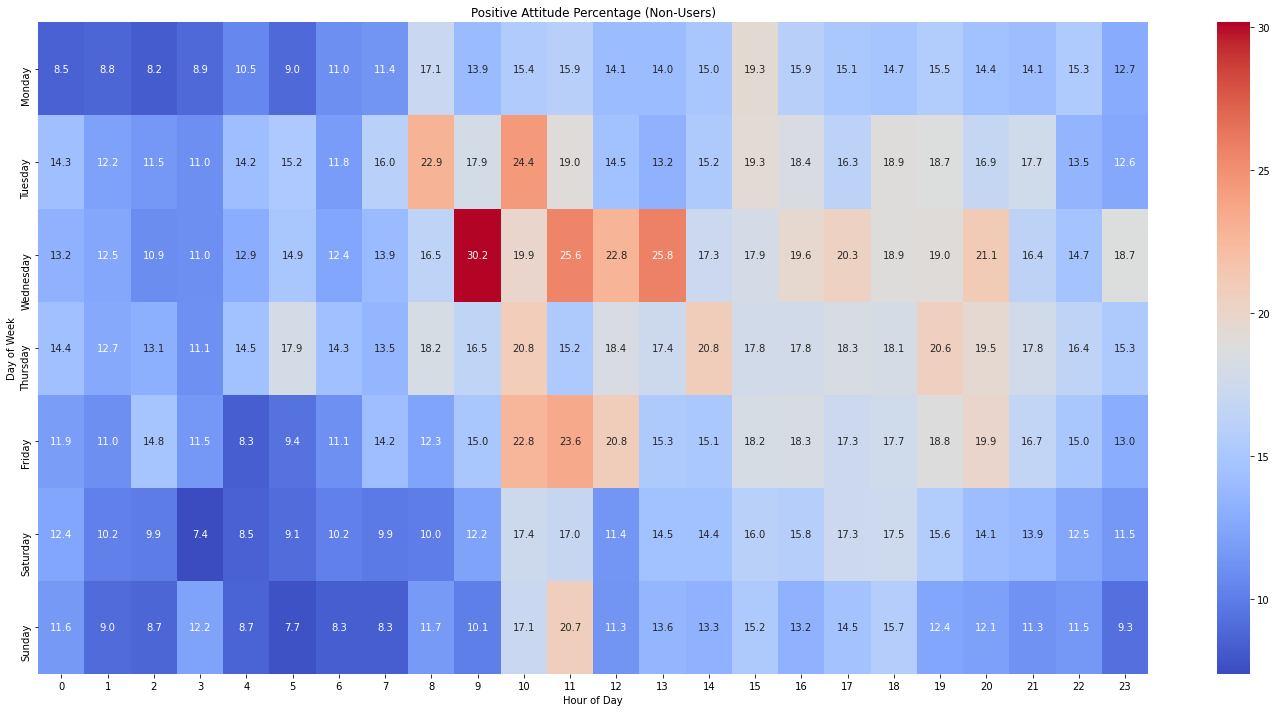

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_non_user, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Positive Attitude Percentage (Non-Users)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

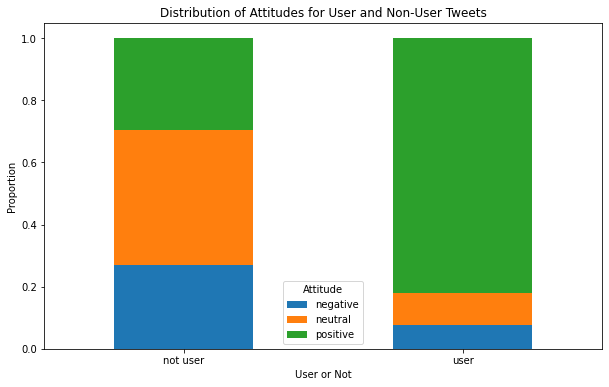

In [11]:
grouped = dfn.groupby(['user_or_not', 'attitude']).size().unstack(fill_value=0)
proportions = grouped.div(grouped.sum(axis=1), axis=0)
proportions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Attitudes for User and Non-User Tweets')
plt.xlabel('User or Not')
plt.ylabel('Proportion')
plt.legend(title='Attitude')
plt.xticks(rotation=0)
plt.show()

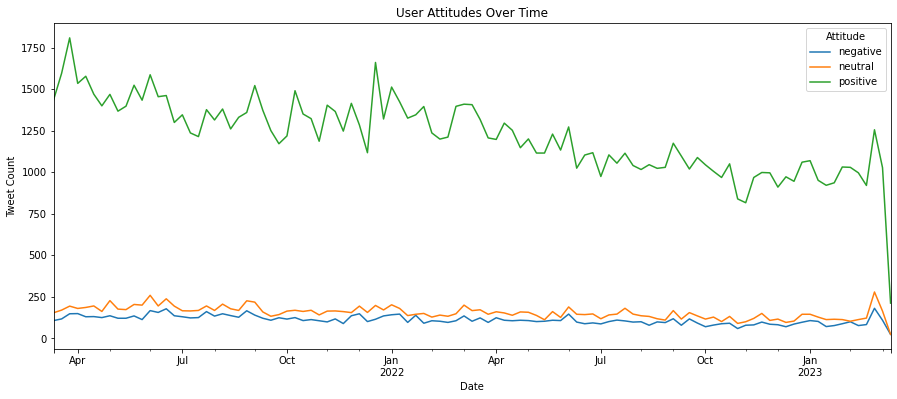

In [12]:

daily_df = dfn.resample('W').count()  # You can change 'D' to 'W' for weekly, 'M' for monthly, etc.

# Separate the data into user and non-user dataframes
user_df = dfn[dfn['user_or_not'] == 'user']
non_user_df = dfn[dfn['user_or_not'] == 'not user']

# Aggregate attitudes
user_attitudes = user_df.groupby([pd.Grouper(freq='W'), 'attitude']).size().unstack().fillna(0)
non_user_attitudes = non_user_df.groupby([pd.Grouper(freq='W'), 'attitude']).size().unstack().fillna(0)
plt.figure(figsize=(15, 6))
user_attitudes.plot(ax=plt.gca())
plt.title('User Attitudes Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend(title='Attitude')
plt.show()

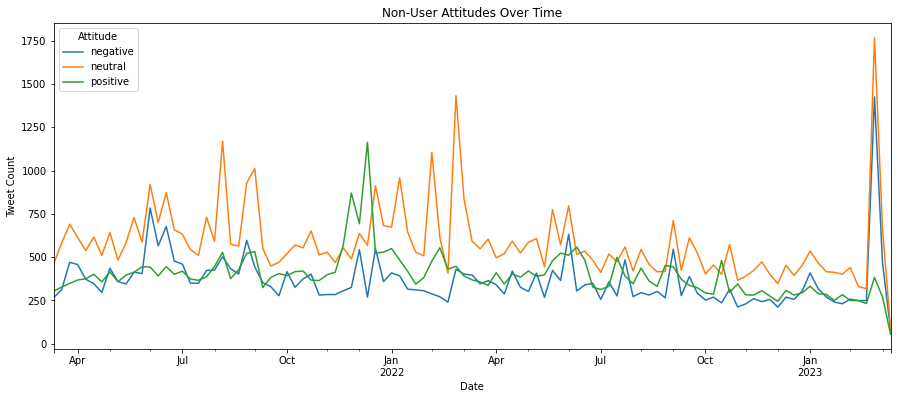

In [13]:
plt.figure(figsize=(15, 6))
non_user_attitudes.plot(ax=plt.gca())
plt.title('Non-User Attitudes Over Time')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend(title='Attitude')
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yiweihan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


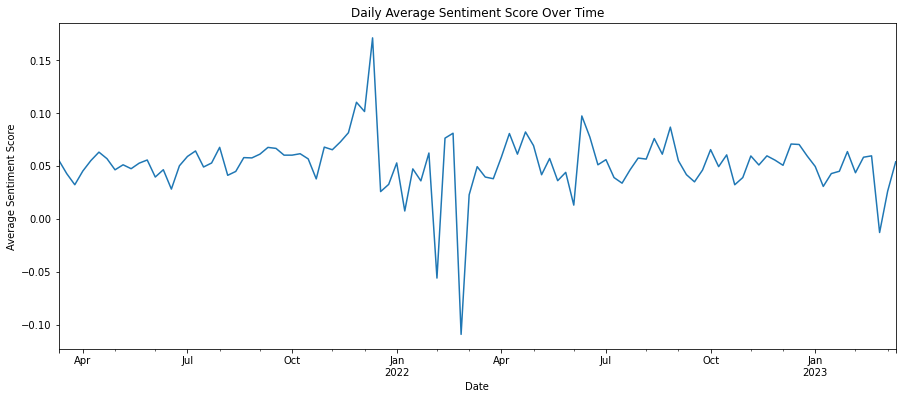

In [15]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def get_sentiment_score(text):
    return sia.polarity_scores(text)['compound']

# Apply function to calculate sentiment score for each tweet
dfn['sentiment_score'] = dfn['Text'].apply(get_sentiment_score)


daily_sentiment = dfn['sentiment_score'].resample('W').mean()

# Plotting
plt.figure(figsize=(15, 6))
daily_sentiment.plot()

plt.title('Daily Average Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.show()

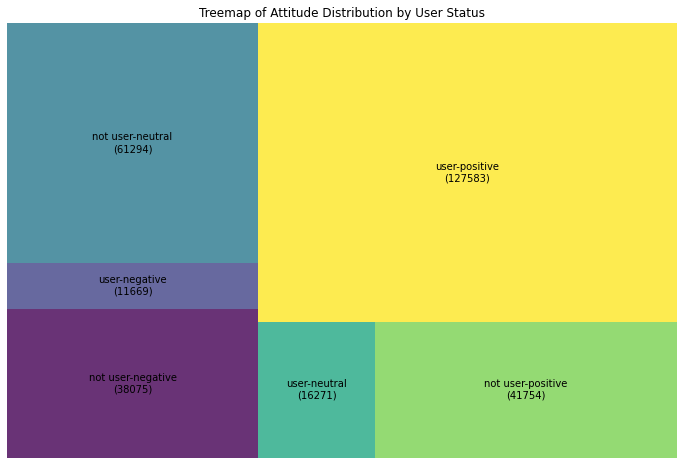

In [18]:
!pip install squarify
import squarify
import numpy as np
grouped = dfn.groupby(['attitude', 'user_or_not']).size().reset_index(name='counts')
grouped['label'] = grouped['user_or_not'].astype(str) + '-' + grouped['attitude'] + '\n(' + grouped['counts'].astype(str) + ')'
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(grouped['label'])))
squarify.plot(sizes=grouped['counts'], label=grouped['label'], alpha=0.8, color=colors)
plt.title('Treemap of Attitude Distribution by User Status')
plt.axis('off')
plt.show()